# Project: Investigating A Gapminder World Attributes
Some attributes have been downloaded from the opensource open numbers database and combined into a single data frame.
Further analysis have been made to draw conclusions from.<br> <br>
<B>P.S: Note that this report does not study which factor is affecting the most in country development, rather the most correlated factor with the country development.</B>

## Table of Contents
<ul style="list-style: none;">
<li><a href="#Q">1. Hypothetical Questions</a></li>
<li><a href="#Wrangling">2. Data Wrangling</a></li>
<li><a href="#EDA">3. Exploratory Data Analysis</a></li>
    <ul>
        <li> <a href="#STP">Selecting the top three effective parameters    </a></li>
    </ul>
    <li><a href="#Results">4. Results</a></li>
<li><a href="#Limitations">5.Limitations</a></li>
<li><a href="#conclusions">6. Conclusions</a></li>
</ul>

<b>Independent Variables are:</b>
<ol style = "list-style='upper-roman'">
    <li> Number of patents </li>
    <li> Agriculture percent of GDP </li>
    <li> Industry percent of GDP </li>
    <li> Total health spending percent of GDP </li>
    <li> Government health spending percent of total gov spending </li>
</ol>
<b> Dependent Variables are:</b>
<ol style = "list-style='upper-roman'">
    <li> GDP per Captia </li>
    <li> Number of Personal Computers </li>
    <li> Number of Internet Users </li>
</ol>

<a id='Q'></a>
## 1. Hypothetical Questions
1. How are the countries doing economically?
2. What factors affect the country development? what discriminates between 1st and 3rd world countries?
<lu>
    <li> Economic growth reflects how the country is doing in terms of <b>short-term</b> developing</li>
    <li> Number of internet users and personal computers may reflect how the country is doing in terms of <b>long-term</b> developing.</li>
</lu>
<br>
<br>
<b>In another form:</b>
Does the following factors have any correlation with the country development; short-term and long-term?
<lu>
    <li> Number of patents </li>
    <li> Agriculture percent of GDP </li>
    <li> Industry percent of GDP </li>
    <li> Total health spending percent of GDP </li>
    <li> Government health spending percent of total gov spending </li>
</lu>

In [1]:
#Import main packages
import pandas as pd
import numpy as np
from functools import reduce
%matplotlib inline

In [2]:
#Loading the databases
df0 = pd.read_csv('patents_granted_total--by--geo--time.csv')
df1 = pd.read_csv('ddf--datapoints--agriculture_percent_of_gdp--by--geo--time.csv')
df2 = pd.read_csv('industry_percent_of_gdp--by--geo--time.csv')
df3 = pd.read_csv('total_health_spending_percent_of_gdp--by--geo--time.csv')
df4 = pd.read_csv('government_health_spending_of_total_gov_spending_percent--by--geo--time.csv')
df5 = pd.read_csv('ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')
df6 = pd.read_csv('ddf--datapoints--personal_computers_total--by--geo--time.csv')
df7 = pd.read_csv('internet_users--by--geo--time.csv')

In [3]:
#Inner-Joinning all the parameters into a single dataframe on the common attributes (geo and time)
dfs = [df0, df1, df2, df3, df4, df5, df6, df7]
df_final = reduce(lambda left,right: pd.merge(left,right,on=['geo', 'time']), dfs[1:8])
df_final= pd.merge(left = df_final, right = df0, how = 'left', on=['geo','time'])
ptnts = df_final['patents_granted_total']
df_final.drop(labels=['patents_granted_total'], axis=1,inplace = True)
df_final.insert(2, 'patents_granted_total', ptnts)

In [4]:
#View the joinning result
df_final.head()

,geo,time,patents_granted_total,agriculture_percent_of_gdp,industry_percent_of_gdp,total_health_spending_percent_of_gdp,government_health_spending_of_total_gov_spending_percent,income_per_person_gdppercapita_ppp_inflation_adjusted,personal_computers_total,internet_users
0,afg,2005,NaN,31.11485,26.81210,6.630,1.475,1099,85000,1.22415
1,afg,2006,NaN,28.63597,28.21077,6.770,1.475,1124,100000,2.10712
2,ago,1997,NaN,9.00202,60.75774,2.261,3.574,3892,8000,0.00567
3,ago,1998,NaN,12.91118,55.15729,1.855,3.152,3946,10000,0.01845
4,ago,1999,NaN,6.29026,72.71737,1.938,1.764,3903,12000,0.07196


In [5]:
#Writing the result into a new csv file
df_final.to_csv('FinalData.csv', index= False)

<a id='Wrapping'></a>
## 2. Data Wrangling

In [6]:
#Get the dataFrame info
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1590 entries, 0 to 1589
Data columns (total 10 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   geo                                                       1590 non-null   object 
 1   time                                                      1590 non-null   int64  
 2   patents_granted_total                                     559 non-null    float64
 3   agriculture_percent_of_gdp                                1590 non-null   float64
 4   industry_percent_of_gdp                                   1590 non-null   float64
 5   total_health_spending_percent_of_gdp                      1590 non-null   float64
 6   government_health_spending_of_total_gov_spending_percent  1590 non-null   float64
 7   income_per_person_gdppercapita_ppp_inflation_adjusted     1590 non-null   int64  
 8   personal_computers

In [7]:
#Get the dataFrame size
df_final.shape

(1590, 10)

In [8]:
#Double checking the duplicated number
sum(df_final.duplicated())

0

In [9]:
#If no patents are recorded (NA), then populate that year with a zero
df_final['patents_granted_total'].fillna(0,inplace=True)

In [10]:
#Get the dataFrame info
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1590 entries, 0 to 1589
Data columns (total 10 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   geo                                                       1590 non-null   object 
 1   time                                                      1590 non-null   int64  
 2   patents_granted_total                                     1590 non-null   float64
 3   agriculture_percent_of_gdp                                1590 non-null   float64
 4   industry_percent_of_gdp                                   1590 non-null   float64
 5   total_health_spending_percent_of_gdp                      1590 non-null   float64
 6   government_health_spending_of_total_gov_spending_percent  1590 non-null   float64
 7   income_per_person_gdppercapita_ppp_inflation_adjusted     1590 non-null   int64  
 8   personal_computers

<a id='EDA'></a>
## 3. Exploring Data
To study which factor may contribute the most visually, plot the scatter matrix 

In [11]:
#Number of unique entries in geo column (Countries)
df_final['geo'].nunique()

169

In [12]:
#Display list of countries (geo columns)
df_final['geo'].unique()

array(['afg', 'ago', 'alb', 'are', 'arg', 'atg', 'aus', 'aut', 'aze',
       'bdi', 'bel', 'ben', 'bfa', 'bgd', 'bgr', 'bhr', 'bhs', 'bih',
       'blz', 'bol', 'bra', 'brb', 'brn', 'btn', 'bwa', 'can', 'che',
       'chl', 'chn', 'civ', 'cmr', 'cod', 'cog', 'col', 'com', 'cpv',
       'cri', 'cub', 'cyp', 'cze', 'deu', 'dma', 'dnk', 'dom', 'dza',
       'ecu', 'egy', 'eri', 'esp', 'est', 'eth', 'fin', 'fji', 'fra',
       'fsm', 'gab', 'gbr', 'geo', 'gha', 'gin', 'gmb', 'gnb', 'grc',
       'grd', 'gtm', 'guy', 'hnd', 'hrv', 'hti', 'hun', 'idn', 'ind',
       'irl', 'irn', 'irq', 'isl', 'isr', 'ita', 'jam', 'jor', 'jpn',
       'ken', 'kgz', 'khm', 'kir', 'kna', 'kor', 'lao', 'lbn', 'lby',
       'lka', 'lso', 'ltu', 'lux', 'lva', 'mar', 'mda', 'mdg', 'mdv',
       'mex', 'mhl', 'mkd', 'mli', 'mlt', 'mmr', 'mng', 'moz', 'mrt',
       'mus', 'mwi', 'mys', 'nam', 'ner', 'nga', 'nic', 'nld', 'nor',
       'npl', 'nzl', 'omn', 'pak', 'pan', 'per', 'phl', 'png', 'pol',
       'prt', 'pry',

View the entire dataset quickly by plotting the scatter matrix

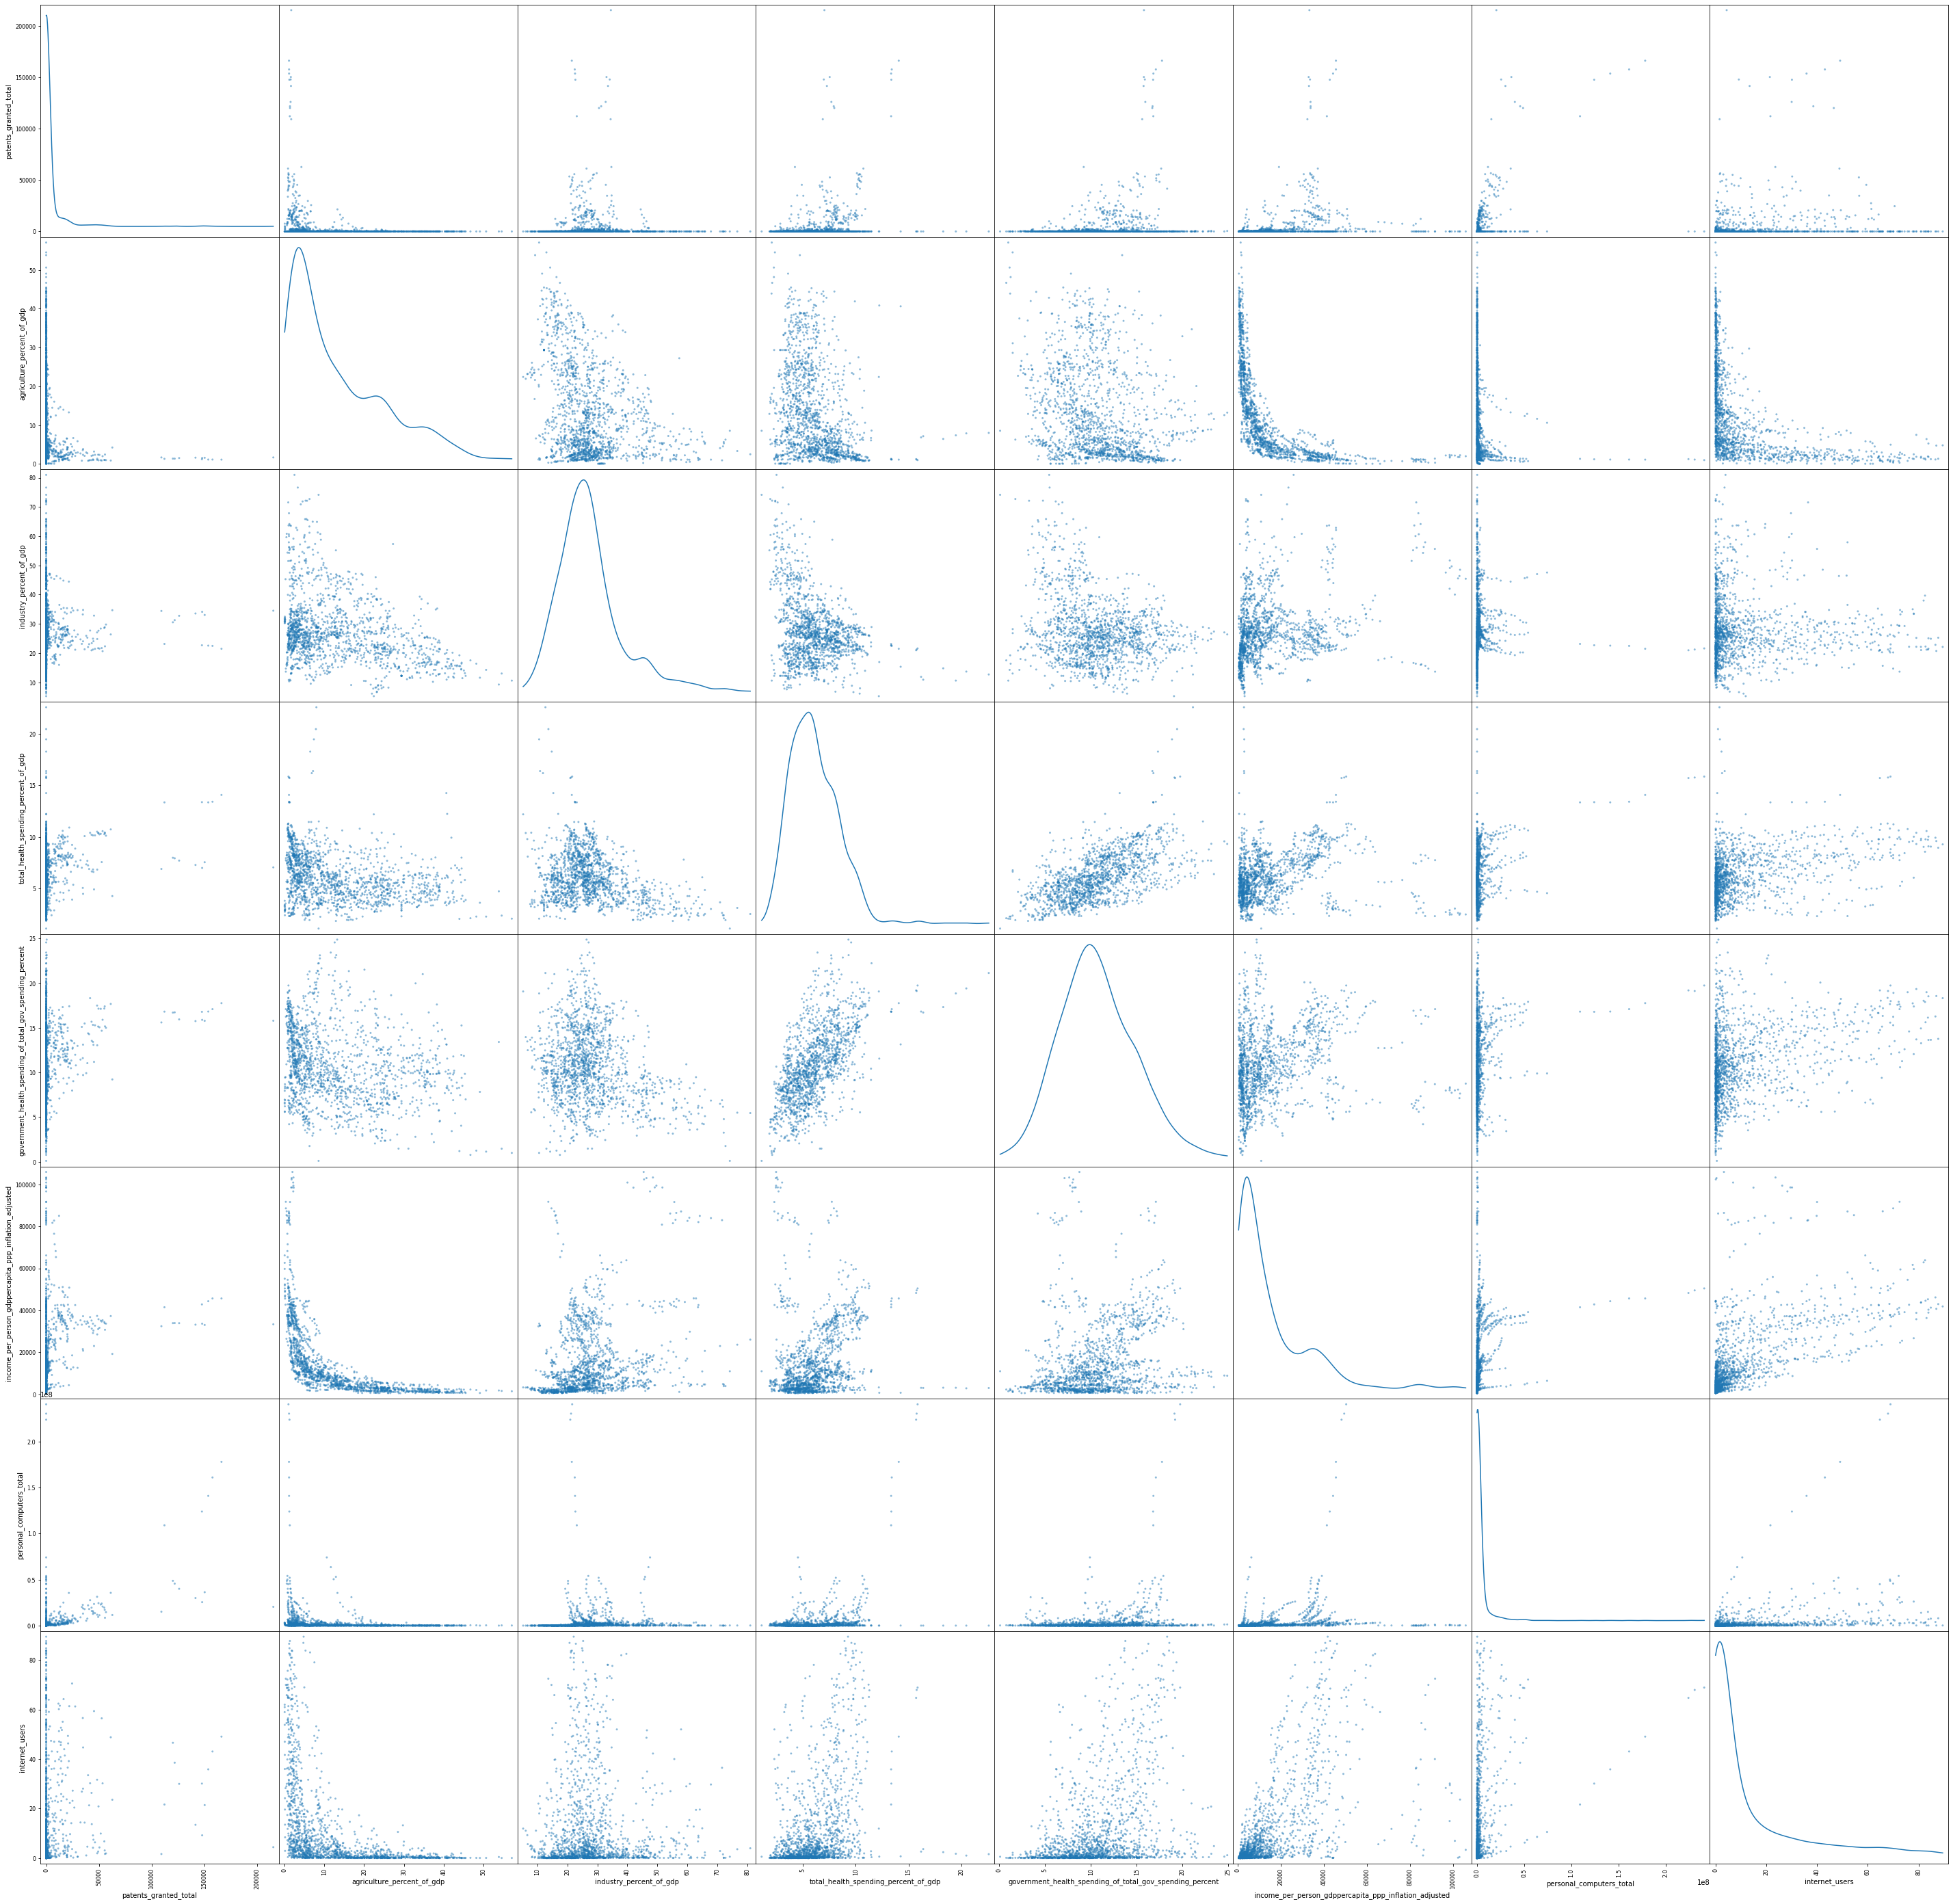

In [13]:
#Plotting the number of patents with dependent factors
pd.plotting.scatter_matrix(df_final.iloc[:,2:10], figsize=(50,50), diagonal = 'kde');

<a id='STP'></a>
### Selecting the top three effective parameters 
Selecting the most effective three parameters for the report as per the project instructions
<ul>
    <li>Patents_granted_totalr</li>
    <li>Agriculture_percent_of_gdp</li>
    <li>Industry_percent_of_gdp</li>
    <li>total_health_spending_percent_of_gdp</li>
</ul>

P.S: Note that this report does not study which factor is effecting the most, rather the most correlated factor with the country development.

In [14]:
#Print the column names
for i,label in enumerate(df_final.columns):
    print(i,label)

0 geo
1 time
2 patents_granted_total
3 agriculture_percent_of_gdp
4 industry_percent_of_gdp
5 total_health_spending_percent_of_gdp
6 government_health_spending_of_total_gov_spending_percent
7 income_per_person_gdppercapita_ppp_inflation_adjusted
8 personal_computers_total
9 internet_users


Then, View how each parameter affect the dependent parameter

In [15]:
#import plot library
import matplotlib.pyplot as plt

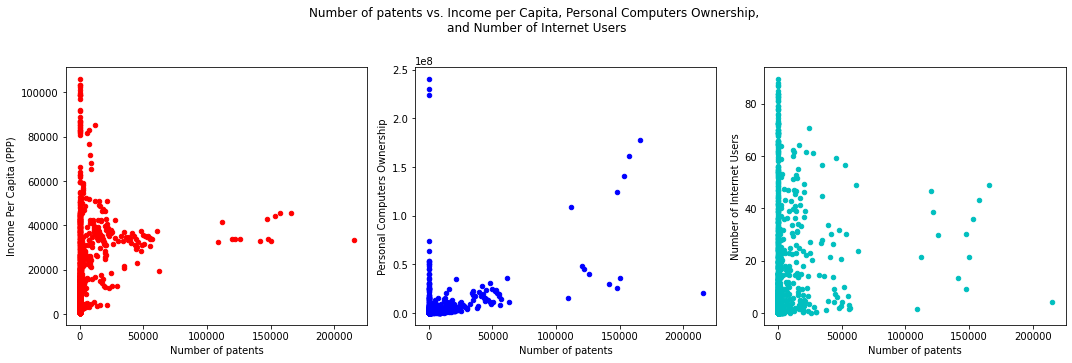

In [16]:
#plot the number of patents vs. (GDP per capita, Personal Computers Ownership, Number of Internet users)
#1. plot the number of patents vs. GDP per capita
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(15,5))
df_final.plot(ax= axes[0],x='patents_granted_total', y = 'income_per_person_gdppercapita_ppp_inflation_adjusted', kind='scatter', color = 'r');
axes[0].set_xlabel("Number of patents")
axes[0].set_ylabel("Income Per Capita (PPP)")
#2. plot the number of patents vs. Personal Computers Ownership
df_final.plot(ax= axes[1],x='patents_granted_total', y = 'personal_computers_total', kind='scatter', color = 'b');
axes[1].set_xlabel("Number of patents")
axes[1].set_ylabel("Personal Computers Ownership")
#3. plot the number of patents vs. Number of Internet Users)
df_final.plot(ax= axes[2],x='patents_granted_total', y = 'internet_users', kind='scatter', color='c');
axes[2].set_xlabel("Number of patents")
axes[2].set_ylabel("Number of Internet Users")
#Add the plot title
plt.suptitle("Number of patents vs. Income per Capita, Personal Computers Ownership, \nand Number of Internet Users", y = 1.0)
plt.tight_layout()

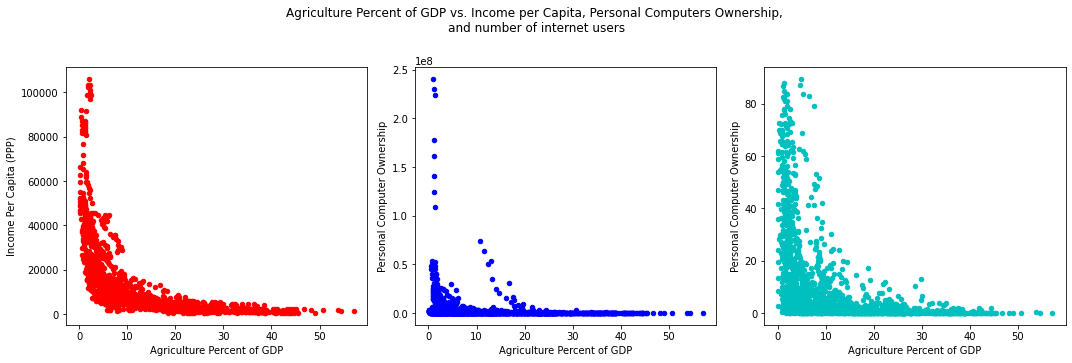

In [17]:
#plot the Agriculture Percent of GDP vs. (GDP per capita, Personal Computers Ownership, Number of Internet users)
#1. plot the Agriculture Percent of GDP vs. GDP per capita
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(15,5))
df_final.plot(ax= axes[0],x='agriculture_percent_of_gdp', y = 'income_per_person_gdppercapita_ppp_inflation_adjusted', kind='scatter', color = 'r');
axes[0].set_xlabel("Agriculture Percent of GDP")
axes[0].set_ylabel("Income Per Capita (PPP)")
#2. plot the Agriculture Percent of GDP vs. Personal Computers Ownership
df_final.plot(ax= axes[1],x='agriculture_percent_of_gdp', y = 'personal_computers_total', kind='scatter', color = 'b');
axes[1].set_xlabel("Agriculture Percent of GDP")
axes[1].set_ylabel("Personal Computer Ownership")
#3. plot the Agriculture Percent of GDP vs. Number of Internet users
df_final.plot(ax= axes[2],x='agriculture_percent_of_gdp', y = 'internet_users', kind='scatter', color='c');
axes[2].set_xlabel("Agriculture Percent of GDP")
axes[2].set_ylabel("Personal Computer Ownership")
#Add the plot title
plt.suptitle("Agriculture Percent of GDP vs. Income per Capita, Personal Computers Ownership, \nand number of internet users", y = 1.0)
plt.tight_layout()

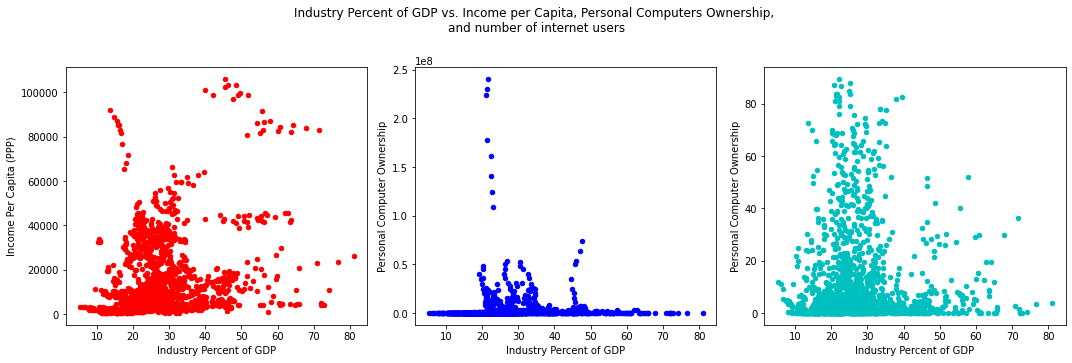

In [18]:
#plot the Industry Percent of GDP vs. (GDP per capita, Personal Computers Ownership, Number of Internet users)
#1. plot the Industry Percent of GDP vs. GDP per capita
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(15,5))
df_final.plot(ax= axes[0],x='industry_percent_of_gdp', y = 'income_per_person_gdppercapita_ppp_inflation_adjusted', kind='scatter', color = 'r');
axes[0].set_xlabel("Industry Percent of GDP")
axes[0].set_ylabel("Income Per Capita (PPP)")
#2. plot the Industry Percent of GDP vs. Personal Computers Ownership
df_final.plot(ax= axes[1],x='industry_percent_of_gdp', y = 'personal_computers_total', kind='scatter', color = 'b');
axes[1].set_xlabel("Industry Percent of GDP")
axes[1].set_ylabel("Personal Computer Ownership")
#3. plot the Industry Percent of GDP vs. Number of Internet users
df_final.plot(ax= axes[2],x='industry_percent_of_gdp', y = 'internet_users', kind='scatter', color='c');
axes[2].set_xlabel("Industry Percent of GDP")
axes[2].set_ylabel("Personal Computer Ownership")
#Add the plot title
plt.suptitle("Industry Percent of GDP vs. Income per Capita, Personal Computers Ownership, \nand number of internet users", y = 1.0)
plt.tight_layout()

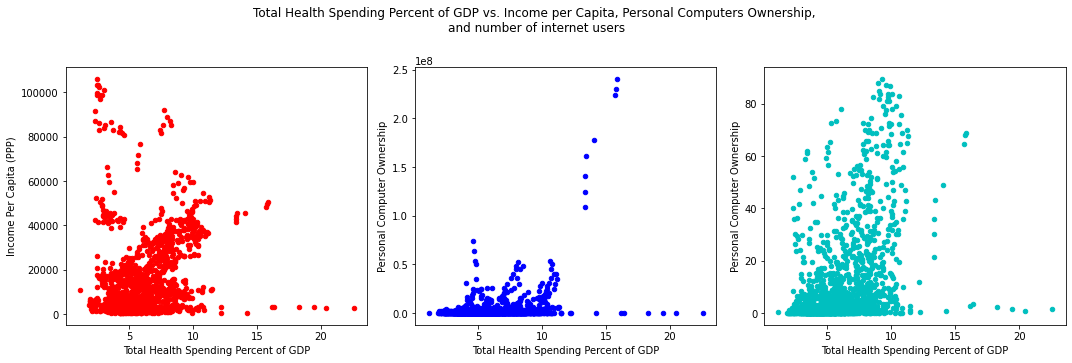

In [19]:
#plot the Total Health Spending Percent of GDP vs. (GDP per capita, Personal Computers Ownership, Number of Internet users)
#1. plot the Total Health Spending Percent of GDP vs. GDP per capita
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(15,5))
df_final.plot(ax= axes[0],x='total_health_spending_percent_of_gdp', y = 'income_per_person_gdppercapita_ppp_inflation_adjusted', kind='scatter', color = 'r');
axes[0].set_xlabel("Total Health Spending Percent of GDP")
axes[0].set_ylabel("Income Per Capita (PPP)")
#2. plot the Industry Percent of GDP vs. Personal Computers Ownership
df_final.plot(ax= axes[1],x='total_health_spending_percent_of_gdp', y = 'personal_computers_total', kind='scatter', color = 'b');
axes[1].set_xlabel("Total Health Spending Percent of GDP")
axes[1].set_ylabel("Personal Computer Ownership")
#3. plot the Industry Percent of GDP vs. Number of Internet users
df_final.plot(ax= axes[2],x='total_health_spending_percent_of_gdp', y = 'internet_users', kind='scatter', color='c');
axes[2].set_xlabel("Total Health Spending Percent of GDP")
axes[2].set_ylabel("Personal Computer Ownership")
#Add the plot title
plt.suptitle("Total Health Spending Percent of GDP vs. Income per Capita, Personal Computers Ownership, \nand number of internet users", y = 1.0)
plt.tight_layout()

 <hr>
 View the most developed and developing countries

Text(0, 0.5, 'Country')

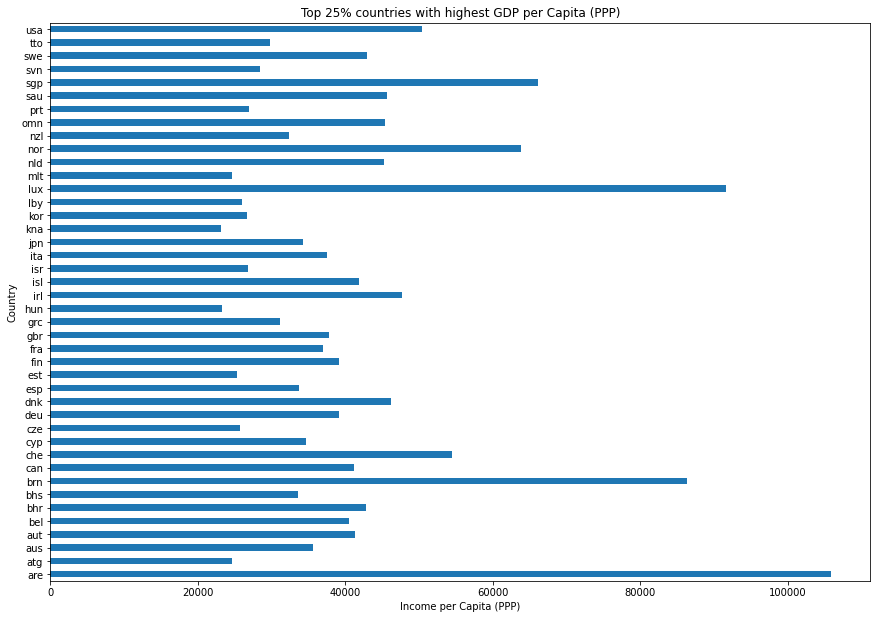

In [20]:
#Above Q3 Countries in GDP per capita
highC = df_final.loc[df_final.groupby('geo')['income_per_person_gdppercapita_ppp_inflation_adjusted'].idxmax(skipna= True)].iloc[:,np.r_[0,7]]
highCF= highC[highC['income_per_person_gdppercapita_ppp_inflation_adjusted'] > highC['income_per_person_gdppercapita_ppp_inflation_adjusted'].quantile(0.75)]
#plot the horizontal bars of countries with the corresponding PPP
highCF.plot.barh(x='geo', y ='income_per_person_gdppercapita_ppp_inflation_adjusted', figsize=(14.7,10.27), legend=False)

# include title
plt.title("Top 25% countries with highest GDP per Capita (PPP)")
# include x label
plt.xlabel("Income per Capita (PPP)")
# include y label
plt.ylabel("Country")

Text(0, 0.5, 'Country')

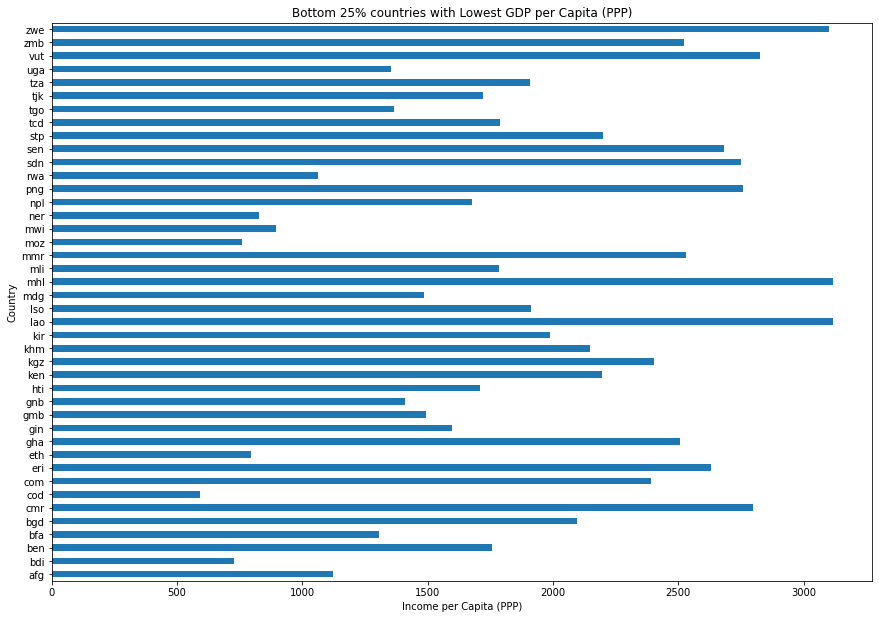

In [21]:
#Below Q3 Countries in GDP per capita
highC = df_final.loc[df_final.groupby('geo')['income_per_person_gdppercapita_ppp_inflation_adjusted'].idxmax(skipna= True)].iloc[:,np.r_[0,7]]
highCF= highC[highC['income_per_person_gdppercapita_ppp_inflation_adjusted'] < highC['income_per_person_gdppercapita_ppp_inflation_adjusted'].quantile(0.25)]
#plot the horizontal bars of countries with the corresponding PPP
highCF.plot.barh(x='geo', y ='income_per_person_gdppercapita_ppp_inflation_adjusted', figsize=(14.7,10.27), legend=False)

# include title
plt.title("Bottom 25% countries with Lowest GDP per Capita (PPP)")
# include x label
plt.xlabel("Income per Capita (PPP)")
# include y label
plt.ylabel("Country")

 <hr>
How do these countrys GDP's perform across the years

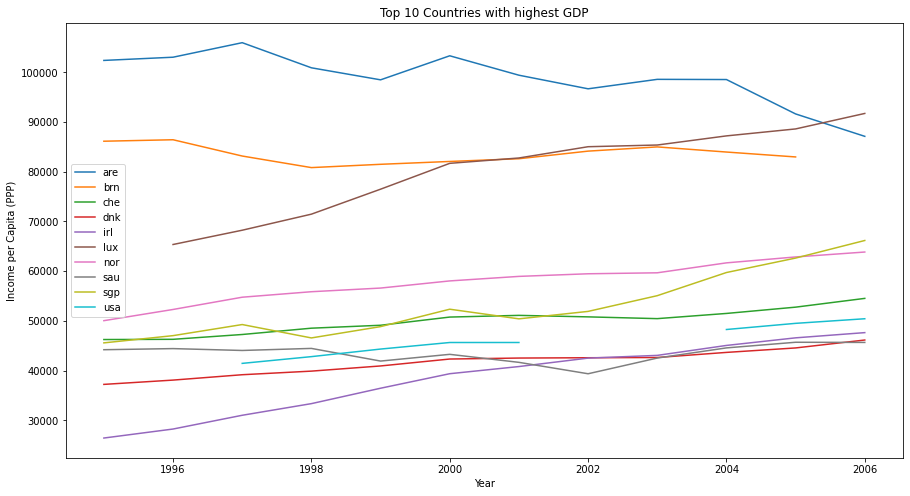

In [22]:
#Get Top 10 Countries
TopC= df_final[df_final['income_per_person_gdppercapita_ppp_inflation_adjusted'] >= df_final['income_per_person_gdppercapita_ppp_inflation_adjusted'].quantile(0.95)]['geo'].unique()
#Plot Highest Country GDP Per Capita
dd = df_final[df_final['geo'].isin(TopC)].iloc[:,np.r_[0:2,7]].groupby(['geo','time']).mean()
dd.unstack(level='geo').plot(figsize=(15,8));

#Add title and axes labels
plt.title('Top 10 Countries with highest GDP');
plt.xlabel('Year');
plt.ylabel('Income per Capita (PPP)');
plt.legend(TopC);

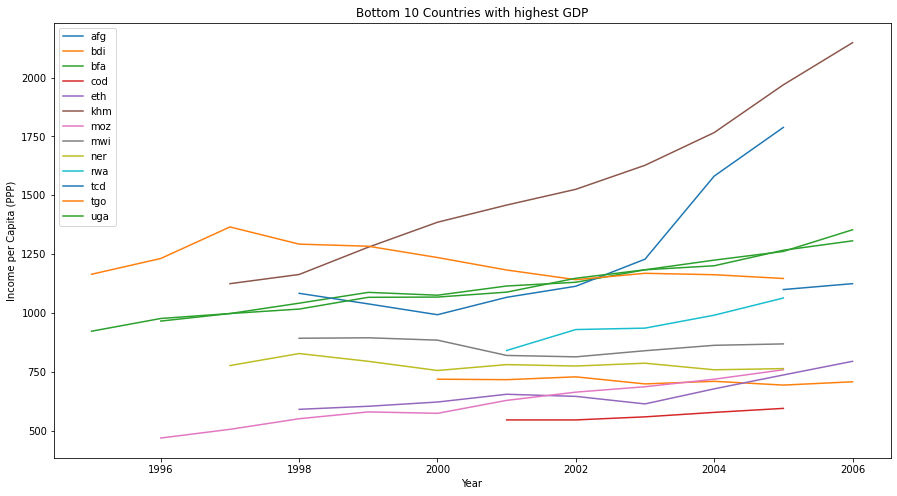

In [23]:
#Get Lowest 13 Countries
botC= df_final[df_final['income_per_person_gdppercapita_ppp_inflation_adjusted'] <= df_final['income_per_person_gdppercapita_ppp_inflation_adjusted'].quantile(0.05)]['geo'].unique()
#Lowed Country GDP Per Capita
dd = df_final[df_final['geo'].isin(botC)].iloc[:,np.r_[0:2,7]].groupby(['geo','time']).mean()
dd.unstack(level='geo').plot(figsize=(15,8));

#Add title and axes labels
plt.title('Bottom 10 Countries with highest GDP');
plt.xlabel('Year');
plt.ylabel('Income per Capita (PPP)');
plt.legend(botC);

Indepth Analysis of the top and bottom countries of GDP per Capita

In [24]:
#Highest Country GDP Per Capita
df_final[df_final['income_per_person_gdppercapita_ppp_inflation_adjusted'] == df_final['income_per_person_gdppercapita_ppp_inflation_adjusted'].max()]['geo']

23    are
Name: geo, dtype: object

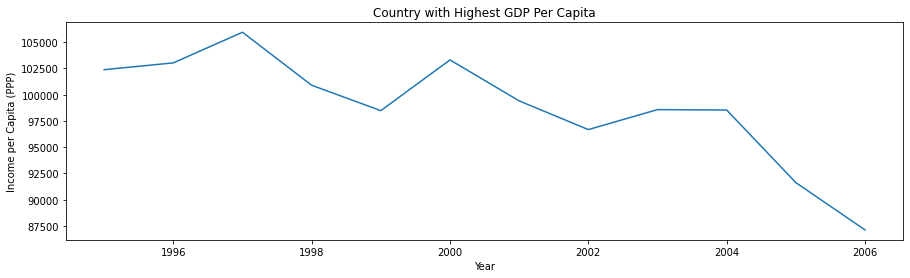

In [25]:
#Country with highest GDP Per Capita
df_final[df_final['geo'] == 'are'].plot(x='time', y = 'income_per_person_gdppercapita_ppp_inflation_adjusted', figsize=(15,4), legend= False);

#Add title and axes labels
plt.title('Country with Highest GDP Per Capita');
plt.xlabel('Year');
plt.ylabel('Income per Capita (PPP)');

In [26]:
#Lowest Country GDP Per Capita
df_final[df_final['income_per_person_gdppercapita_ppp_inflation_adjusted'] == df_final['income_per_person_gdppercapita_ppp_inflation_adjusted'].min()]['geo']

985    moz
Name: geo, dtype: object

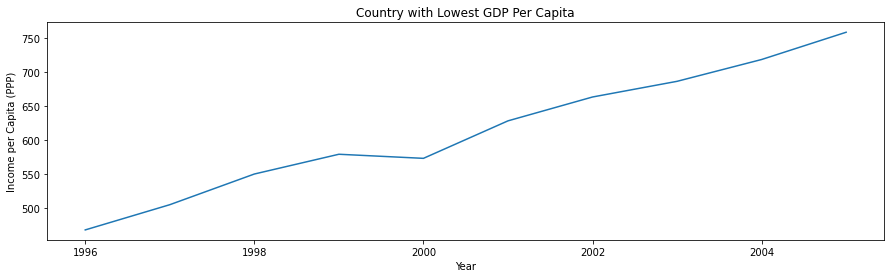

In [27]:
#Lowest Country GDP Per Capita
df_final[df_final['geo'] == 'moz'].plot(x='time', y = 'income_per_person_gdppercapita_ppp_inflation_adjusted', figsize=(15,4), legend=False);

#Add title and axes labels
plt.title('Country with Lowest GDP Per Capita');
plt.xlabel('Year');
plt.ylabel('Income per Capita (PPP)');

Overall description of the dataset

In [28]:
df_final.iloc[:,2:].describe()

,patents_granted_total,agriculture_percent_of_gdp,industry_percent_of_gdp,total_health_spending_percent_of_gdp,government_health_spending_of_total_gov_spending_percent,income_per_person_gdppercapita_ppp_inflation_adjusted,personal_computers_total,internet_users
count,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1.590000e+03,1590.000000
mean,3455.235849,12.900023,27.448877,6.097275,10.723126,15068.791195,3.240751e+06,10.956095
std,15060.341544,11.555692,10.874883,2.298387,4.029290,17258.144356,1.437893e+07,17.854575
min,0.000000,0.048870,5.251320,1.121000,0.100000,468.000000,5.000000e+02,0.000000
25%,0.000000,3.435405,20.785525,4.441250,7.942750,3164.000000,4.000000e+04,0.381015
50%,0.000000,8.719465,25.842650,5.814500,10.335000,8469.500000,2.068500e+05,2.819945
75%,160.750000,20.518413,31.346477,7.522750,13.337500,20416.250000,1.592250e+06,12.596455
max,215100.000000,57.069190,80.974290,22.570000,24.890000,105953.000000,2.405000e+08,89.510000


In [29]:
#Get the P value
from scipy.stats import kendalltau
def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(kendalltau(df[r], df[c])[1], 4)
    return pvalues


calculate_pvalues(df_final.iloc[:,2:])

,patents_granted_total,agriculture_percent_of_gdp,industry_percent_of_gdp,total_health_spending_percent_of_gdp,government_health_spending_of_total_gov_spending_percent,income_per_person_gdppercapita_ppp_inflation_adjusted,personal_computers_total,internet_users
patents_granted_total,0,0,0.0001,0,0,0,0,0.0067
agriculture_percent_of_gdp,0,0,0,0,0,0,0,0
industry_percent_of_gdp,0.0001,0,0,0,0,0,0,0.0002
total_health_spending_percent_of_gdp,0,0,0,0,0,0,0,0
government_health_spending_of_total_gov_spending_percent,0,0,0,0,0,0,0,0
income_per_person_gdppercapita_ppp_inflation_adjusted,0,0,0,0,0,0,0,0
personal_computers_total,0,0,0,0,0,0,0,0
internet_users,0.0067,0,0.0002,0,0,0,0,0


In [30]:
#Calculate the kendall correlation between the parameters
#kendall correlation is a non-parameteric correlation
#kendall correlation is used because there is a lot of outliers
from scipy.stats import kendalltau
tau = df_final.iloc[:,2:].corr(method ='kendall')
pval = df_final.iloc[:,2:].corr(method=lambda x, y: kendalltau(x, y)[1])
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
tau.round(2).astype(str) + p.astype(str) # + " [" + pval.round(4).astype(str)+'p]'

,patents_granted_total,agriculture_percent_of_gdp,industry_percent_of_gdp,total_health_spending_percent_of_gdp,government_health_spending_of_total_gov_spending_percent,income_per_person_gdppercapita_ppp_inflation_adjusted,personal_computers_total,internet_users
patents_granted_total,1.0,-0.22***,0.07***,0.18***,0.15***,0.27***,0.31***,0.05***
agriculture_percent_of_gdp,-0.22***,1.0,-0.21***,-0.26***,-0.21***,-0.73***,-0.36***,-0.52***
industry_percent_of_gdp,0.07***,-0.21***,1.0,-0.15***,-0.11***,0.22***,0.27***,0.06***
total_health_spending_percent_of_gdp,0.18***,-0.26***,-0.15***,1.0,0.45***,0.23***,0.19***,0.31***
government_health_spending_of_total_gov_spending_percent,0.15***,-0.21***,-0.11***,0.45***,1.0,0.2***,0.15***,0.27***
income_per_person_gdppercapita_ppp_inflation_adjusted,0.27***,-0.73***,0.22***,0.23***,0.2***,1.0,0.41***,0.54***
personal_computers_total,0.31***,-0.36***,0.27***,0.19***,0.15***,0.41***,1.0,0.36***
internet_users,0.05***,-0.52***,0.06***,0.31***,0.27***,0.54***,0.36***,1.0


In [31]:
#Get the lowest income per capita year for each country
df_final.loc[df_final.groupby('geo')['income_per_person_gdppercapita_ppp_inflation_adjusted'].idxmin(skipna= True)]

,geo,time,patents_granted_total,agriculture_percent_of_gdp,industry_percent_of_gdp,total_health_spending_percent_of_gdp,government_health_spending_of_total_gov_spending_percent,income_per_person_gdppercapita_ppp_inflation_adjusted,personal_computers_total,internet_users
0,afg,2005,0.0,31.11485,26.81210,6.630,1.475,1099,85000,1.22415
2,ago,1997,0.0,9.00202,60.75774,2.261,3.574,3892,8000,0.00567
11,alb,1997,0.0,31.54334,18.10958,4.806,6.475,4064,10000,0.04859
32,are,2006,0.0,1.09424,57.90311,2.328,8.952,87120,1400000,52.00000
40,arg,2002,0.0,10.20665,30.55774,8.316,15.260,12481,3000000,10.88212
...,...,...,...,...,...,...,...,...,...,...
1545,wsm,1997,0.0,20.16169,24.89754,5.453,17.450,3932,500,0.17457
1555,yem,1996,0.0,16.72813,40.25162,4.750,5.175,3660,15000,0.00062
1566,zaf,1995,5453.0,3.53716,31.91711,7.488,9.546,9174,1100000,0.67674
1577,zmb,1998,20.0,15.86841,27.27739,6.529,13.280,2064,60000,0.03023


In [32]:
#Get the Highest income per capita year for each country
df_final.loc[df_final.groupby('geo')['income_per_person_gdppercapita_ppp_inflation_adjusted'].idxmax(skipna= True)]

,geo,time,patents_granted_total,agriculture_percent_of_gdp,industry_percent_of_gdp,total_health_spending_percent_of_gdp,government_health_spending_of_total_gov_spending_percent,income_per_person_gdppercapita_ppp_inflation_adjusted,personal_computers_total,internet_users
1,afg,2006,0.0,28.63597,28.21077,6.770,1.475,1124,100000,2.10712
9,ago,2006,0.0,5.19128,58.10933,2.415,6.061,5500,110600,1.50000
20,alb,2006,0.0,17.70839,25.30819,6.732,9.055,7914,120000,9.60999
23,are,1997,0.0,2.00402,45.42841,2.487,8.757,105953,200000,3.29559
36,arg,1998,1689.0,5.25272,26.71214,8.536,14.950,15973,1915000,0.83077
...,...,...,...,...,...,...,...,...,...,...
1554,wsm,2006,0.0,11.67243,28.61449,5.320,16.980,5412,4200,4.46917
1565,yem,2006,0.0,10.14754,49.25037,5.257,4.871,4265,600000,1.24782
1576,zaf,2005,0.0,2.38962,27.13741,8.814,10.410,10995,3966000,7.48854
1584,zmb,2005,0.0,14.58855,26.84962,7.000,14.740,2524,131000,2.85175


In [33]:
#Get the country with the lowest income per capita
df_final[df_final['income_per_person_gdppercapita_ppp_inflation_adjusted']== df_final['income_per_person_gdppercapita_ppp_inflation_adjusted'].min()]

,geo,time,patents_granted_total,agriculture_percent_of_gdp,industry_percent_of_gdp,total_health_spending_percent_of_gdp,government_health_spending_of_total_gov_spending_percent,income_per_person_gdppercapita_ppp_inflation_adjusted,personal_computers_total,internet_users
985,moz,1996,0.0,29.08968,13.93865,4.268,14.05,468,15000,0.00304


In [34]:
#Get the country with the Highest income per capita
df_final[df_final['income_per_person_gdppercapita_ppp_inflation_adjusted']== df_final['income_per_person_gdppercapita_ppp_inflation_adjusted'].max()]

,geo,time,patents_granted_total,agriculture_percent_of_gdp,industry_percent_of_gdp,total_health_spending_percent_of_gdp,government_health_spending_of_total_gov_spending_percent,income_per_person_gdppercapita_ppp_inflation_adjusted,personal_computers_total,internet_users
23,are,1997,0.0,2.00402,45.42841,2.487,8.757,105953,200000,3.29559


<a id='Results'></a>
## 4. Results

1. Countries with the Lowest GDP showed that there is a potential growth in their GDP across the years; such as khm and afg.
2. Countries with the Highest GDP showed that their economical system is steady since they showed almost the same GDP across years; such as sau and nor.
3. Some parameters could be correlated to the GDP increase of the top GDP countries.

<a id='Limitations'></a>
## 5. Limitations

1. The data was open source data and community maintained; hence, its percision is not so high. Accordingly, generalization and inferences could not be drawn from the data.
2. Correlation coefficients does not generally describe all the data, it only shows the relationship. To better describe the model, a regression model should be created with the data.
3. The GDP per capita does not reflect the lifestyle level of the citizens.
4. Number of Personal computers and Internet users are biased to estimate the lifestyle level of the citizens, since one citizen may have multiple personal computers and access internet from different PC's.
5. Other factors affect the citizens lifestyle such as number of companies and their sizes in the country, but this data was not accessible.

<a id='conclusions'></a>
## 6. Conclusion (Correlation and graphs)
### A. Graphs Interpretations

1. Number of patents does not significantly affect the country development (long-term and short-term), perhaps it might be a reflection of good educational system. Yet in this case, the relationship between the educational system and the number of patents needs to be studied.
2. Agricultural percentage of GDP is significantly affecting the country development (long-term and short-term). The more the agricultural industry is eating from the GDP, the less the GDP per captia is. As a rule of sum, less than 30% of the agricultural share is a good standing point.
3. Industial percentage of GDP is significanlty affecting the country short-term development; however, it is not significantly affecting the long-term development. The more the country is industrial, the more it is stronger in the GDP.
4. Total health spending percent of GDP is significantly affecting the country development (long-term and short-term).

### B. Correlation Interpretations

The correlation matrices confirms the above interpretation in the following way: <br>
High correlation means there is a (normal or inverse) relationship between the parameters. <br>
The high the abs(correlation) is, the stronger the relationship is.<br>
Negative correlation means inverse relationship between the parameters while positive means normal relationship.<br>
The low P-value for all the measurements suggests that the correclation is very significant